<h1 style="text-align: center; font-size: 2.5em; color: navy; font-family: Arial, sans-serif; font-weight: bold;">
Astrophysical Techniques – Tutorial IRAF
</h1>

<h2 style="text-align: center; font-size: 2em; color: black; font-family: Arial, sans-serif;">
Spectroscopy - Data Reduction and Interpretation
</h2>

<p style="text-align: center; font-size: 1.2em; font-family: Georgia, serif;">
Master in Astrophysics and Space Science (MASS) <br>
Department of Astronomy, University of Belgrade <br>
Instructor: Prof. Dragana Ilić
</p>

<p style="text-align: center; font-size: 1.2em; font-family: Georgia, serif; font-style: italic;">
Report by Nandita Das
</p>

<div style="background-color: #f9f9f9; border: 1px solid #ccc; border-radius: 5px; padding: 15px; font-family: Georgia, serif;">

<h2 style="text-align: center; color: navy; font-size: 1.5em; font-weight: bold;">Abstract</h2>

<p style="text-align: justify; font-size: 1.1em; line-height: 1.6;">
This report, based on the task <i>"Task 11: Spectroscopy - Data Reduction and Interpretation"</i> by A. Kaminski, J. Heidt, and V. Pfeifer 
(see Homework Reference), outlines the reduction of spectroscopic data using the Image Reduction and Analysis Facility (IRAF) software. 
The objective was to process raw spectroscopic observations into scientifically analyzable one-dimensional spectra. The datasets, acquired 
from Copernico and Galileo Telescopes in the Asiago Observatory , included raw images of celestial targets, calibration frames (bias, flat-field, and arc lamp spectra), and a standard star for flux calibration. This report focuses exclusively on the Copernico dataset.
</p>

<p style="text-align: justify; font-size: 1.1em; line-height: 1.6;">
Focusing on Section 5, the data reduction workflow comprised applying bias correction to remove electronic offsets, normalizing the flat-field 
to correct for pixel sensitivity variations, extracting one-dimensional spectra from two-dimensional images, performing wavelength calibration 
using arc lamp spectra, and correcting for the instrumental response. Additionally, the final spectra were corrected for interstellar extinction 
to account for absorption effects caused by the interstellar medium. These reduction steps ensured the mitigation of instrumental, environmental, 
and interstellar effects, enabling accurate spectral analysis. The processed spectra are now suitable for advanced studies, such as object classification, 
chemical composition analysis, and redshift determination.
</p>

</div>


In [1]:
# Importing required libraries
import astropy
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Markdown, display
from IPython.display import HTML
from tabulate import tabulate
from colorama import Fore, Style, init

# **Introduction to IRAF**

---
The **Image Reduction and Analysis Facility (IRAF)** is a powerful software suite designed to handle the complex tasks of astronomical data reduction and analysis. Observational data, typically captured using Charge-Coupled Devices (CCDs), often contains instrumental and environmental effects that must be corrected before scientific analysis. IRAF provides a comprehensive set of tools to perform these corrections, making it an indispensable resource for astronomers.

One of IRAF's key features is its ability to process **two-dimensional spectral data** and convert it into scientifically analyzable **one-dimensional flux distributions** across the wavelength axis. This process is critical for extracting meaningful results from raw data, whether for photometric or spectroscopic studies. The software is versatile, supporting data from a variety of instruments and formats, making it adaptable to diverse observational needs.

---
### **Key Features of IRAF:**
- Supports tasks like **bias correction**, **flat-field normalization**, and **wavelength calibration**.
- Provides a hierarchical structure of **packages** and **sub-packages**, enabling modular data reduction workflows.
- Includes an intuitive command interface for performing tasks interactively.

---
### **Preparing to Use IRAF:**
Before starting the data reduction process, some preparatory steps are necessary:
1. **Set the Image Type:**
   Specify the image format to be processed:
   ```shell
   set imtype = "FITS"
2. For Copernico Telescope data, use:
   ```shell
   set dispaxis = 2
4. Use the epar command to configure task parameters interactively:
   ```shell
   example: epar imcombine
   Press Ctrl + D to save and execute the task.
   To run the task just type name of the task : imcombine

---


# **Dataset Overview for Spectral Analysis**

<table style="width: 100%; border-collapse: collapse; margin: 10px auto; text-align: center;">
  <thead>
    <tr style="background-color: #dbeeff; color: #000; font-weight: bold;">
      <th>Type</th>
      <th>Exposure Time [s]</th>
      <th># of Exposures</th>
    </tr>
  </thead>
  <tbody>
    <!-- Bias Frames -->
    <tr style="background-color: #f0f8ff;">
      <td>Bias</td>
      <td>0</td>
      <td>10</td>
    </tr>
    <!-- Flat Frames -->
    <tr style="background-color: #ffebcd;">
      <td>Flats</td>
      <td>8</td>
      <td>10</td>
    </tr>
    <!-- Arc Lamps -->
    <tr style="background-color: #f5f5dc;">
      <td>HgCd Arc Lamp</td>
      <td>60</td>
      <td>3</td>
    </tr>
    <tr style="background-color: #f5f5dc;">
      <td>Ne Arc Lamp</td>
      <td>30</td>
      <td>3</td>
    </tr>
    <!-- Calibration Star -->
    <tr style="background-color: #e6f7e6;">
      <td>BD+28 4211 (Calibrator Star)</td>
      <td>300</td>
      <td>1</td>
    </tr>
    <!-- Science Objects -->
    <tr style="background-color: #fffacd;">
      <td>Object 1</td>
      <td>300</td>
      <td>2</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td></td>
      <td>600</td>
      <td>1</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td>Object 2</td>
      <td>600</td>
      <td>3</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td>Object 3</td>
      <td>600</td>
      <td>3</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td>Object 4</td>
      <td>300</td>
      <td>1</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td>Object 5</td>
      <td>600</td>
      <td>3</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td>Object 6</td>
      <td>600</td>
      <td>4</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td>Object 7</td>
      <td>600</td>
      <td>3</td>
    </tr>
    <tr style="background-color: #fffacd;">
      <td>Object 8</td>
      <td>600</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

In [2]:
# Load the data from the file
file_path = '/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/Copernico_coded.txt'

with open(file_path, 'r') as file:
    copernico_data = file.readlines()

# Clean and structure the data into a DataFrame
columns = ["FILENAME", "OBJECT", "DATE-OBS", "MJD", "LAMP", "EXPOSURE", "SLIT WIDTH", "AIRMASS"]
data = []

for line in copernico_data:
    if line.strip() and not line.startswith("*"):  # Ignore empty and separator lines
        split_line = line.split("|")
        row = [item.strip() for item in split_line if item.strip()]
        if len(row) == len(columns):
            data.append(row)

df = pd.DataFrame(data, columns=columns)

# Correct object names for ARCNe and ARCHgCd if necessary
df.loc[df["LAMP"] == "Ne", "OBJECT"] = "ARCNE"
df.loc[df["LAMP"] == "HgCd", "OBJECT"] = "ARCHGCD"

# Separate the data into distinct categories
categories = {
    "Bias Frames": df[df["OBJECT"] == "BIAS"],
    "Arc Lamps": df[df["OBJECT"].str.contains("ARC", case=False, na=False)],
    "Flats": df[df["OBJECT"] == "FLAT"],
    "Calibration Star": df[df["OBJECT"].str.contains("BD", case=False, na=False)],
    "Science Objects": df[df["OBJECT"].str.contains("Object", case=False, na=False)]
}

# Display each category in a concise format
for category, table in categories.items():
    print(f"Category: {category}")
    print(table[["FILENAME", "OBJECT", "EXPOSURE", "AIRMASS"]].to_string(index=False))
    print("\n")

Category: Bias Frames
     FILENAME OBJECT EXPOSURE AIRMASS
AF507042.fits   BIAS      0.0   1.431
AF507043.fits   BIAS      0.0   1.431
AF507044.fits   BIAS      0.0   1.431
AF507045.fits   BIAS      0.0   1.431
AF507046.fits   BIAS      0.0   1.431
AF507047.fits   BIAS      0.0   1.431
AF507048.fits   BIAS      0.0   1.431
AF507049.fits   BIAS      0.0   1.431
AF507050.fits   BIAS      0.0   1.431
AF507051.fits   BIAS      0.0   1.431


Category: Arc Lamps
     FILENAME  OBJECT EXPOSURE AIRMASS
AF507052.fits   ARCNE     30.0   1.431
AF507053.fits   ARCNE     30.0   1.431
AF507054.fits   ARCNE     30.0   1.431
AF507055.fits ARCHGCD     60.0   1.431
AF507056.fits ARCHGCD     60.0   1.431
AF507057.fits ARCHGCD     60.0   1.431


Category: Flats
     FILENAME OBJECT EXPOSURE AIRMASS
AF507058.fits   FLAT      8.0   1.434
AF507059.fits   FLAT      8.0   1.434
AF507060.fits   FLAT      8.0   1.434
AF507061.fits   FLAT      8.0   1.434
AF507062.fits   FLAT      8.0   1.434
AF507063.fits   FLA

**<h1 style="text-align: center; color: navy;">1: Calibration</h1>**

## <span style="color: #1e90ff;">1.1 Bias Correction</span>

Bias correction is performed to eliminate **electronic noise** introduced during CCD readout. A **Master Bias frame** is created by combining individual bias frames and is applied to all raw science and calibration frames. This process ensures **cleaner data** for further processing.

In [3]:
# Read the text file containing the list of bias frames
with open("/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/bias.txt", "r") as file:
    content = file.read()
print(content)

AF507042.fits   
AF507043.fits   
AF507044.fits   
AF507045.fits   
AF507046.fits   
AF507047.fits   
AF507048.fits   
AF507049.fits   
AF507050.fits   
AF507051.fits   
 



### 1.1.1 Combining Bias Frames

The `zerocombine` task has been used to average multiple bias frames into a single **Master Bias** file (`M_bias.fits`). This ensures that electronic noise introduced during CCD readout is minimized.
### Zerocombine
Here is the parameter configuration used in `zerocombine` for combining bias images:

<div style="text-align: center;">
    <p><strong>ZEROCOMBINE Configuration:</strong></p>
    <img src="bias_zerocombine_crop.png" alt="ZEROCOMBINE Configuration" style="width: 60%; border: 1px solid black;">
</div>

#### Results
The `zerocombine` task successfully created a Master Bias frame (`M_bias.fits`). Below is the visualization of master bias in iraf and ds9:

### Master Bias (Side-by-Side Visualization)

<div style="display: flex; justify-content: space-around; align-items: center;">
    <figure style="text-align: center;">
        <img src="mbias_xg.png" alt="Master Bias (XGTerm)" style="width: 100%; height: auto;">
        <figcaption><b>Master Bias (XGTerm)</b></figcaption>
    </figure>
    <figure style="text-align: center;">
        <img src="mbias_ds9.png" alt="Master Bias (DS9)" style="width: 97%; height: auto;">
        <figcaption><b>Master Bias (DS9)</b></figcaption>
    </figure>
</div>


### 1.1.2 Apply Bias Correction and Trimmimg

### Bias ccdproc
The ccdproc task is used to apply bias correction using the Master Bias frame (M_bias.fits) and to trim the CCD images for more accurate calibration. Below is the parameter configuration used:

<div style="text-align: center;">
    <p><strong>CCDPROC Configuration:</strong></p>
    <img src="bias_ccdproc_crop.png" alt="CCDPROC Configuration" style="width: 60%; border: 1px solid black;">
</div>

#### Results
The `ccdproc` task successfully processed all input files, applying bias correction and trimming unused regions as specified in the configuration.

In [4]:
# Define file paths
file1_path = "/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/all.txt"
file2_path = "/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/all_bias.txt"

# Read file contents
with open(file1_path, 'r') as file1, open(file2_path, 'r') as file2:
    content1 = file1.read()
    content2 = file2.read()

# Display side by side
HTML(f"""
<div style="display: flex; justify-content: space-around;">
    <div style="width: 45%; border: 1px solid #ccc; padding: 10px;">
        <h4>File 1: all.txt</h4>
        <pre>{content1}</pre>
    </div>
    <div style="width: 45%; border: 1px solid #ccc; padding: 10px;">
        <h4>File 2: all_bias.txt</h4>
        <pre>{content2}</pre>
    </div>
</div>
""")

### Comparison of Bias Frames Before and After Correction

Below are the **Bias Frame Before Correction** and **Bias Frame After Correction**, plotted side by side for visual comparison.

<div style="display: flex; justify-content: space-around; align-items: center;">
    <figure style="text-align: center;">
        <img src="AF507042.png" alt="Bias Before Correction" style="width: 100%; height: auto;">
        <figcaption style="font-size: 98%; color: gray; margin-top: 5px;"><b>Bias Before Correction (AF507042.fits)</b></figcaption>
    </figure>
    <figure style="text-align: center;">
        <img src="AF507042_bias.png" alt="Bias After Correction" style="width: 100%; height: auto;">
        <figcaption style="font-size: 98%; color: gray; margin-top: 5px;"><b>Bias After Correction (AF507042_bias.fits</b></figcaption>
    </figure>
</div>

---

### Analysis of Bias Correction

**Before Correction (AF507042.fits):**
- Pixel values range between **1530–1545 DN**, showing a clear electronic offset caused by the CCD detector's bias.
- Includes both structured patterns and random noise typical of raw CCD data.

**After Correction (AF507042_bias.fits):**
- Pixel values are centered around **0 DN**, with a much narrower range (~±10 DN).
- Electronic offset is effectively removed, leaving only noise and actual data.

<div style="background-color: #f0f8ff; border-left: 4px solid #1e90ff; padding: 10px; margin-top: 10px; border-radius: 5px;">
  <b>Key Difference:</b> Bias correction eliminates the detector's offset, ensuring pixel intensities accurately reflect only the incoming light.
</div>

**Conclusion:**
- The correction is successful, preparing the data for subsequent calibration steps (e.g., flat-field correction).

## *Challenges Encountered During `implot` Visualization

While using the `implot` task to analyze the bias-corrected frames, I encountered an issue where <span style="color: red; font-weight: bold;">unwanted boxes</span> persisted on the display. These boxes were unintentionally added during a previous session and did not disappear even after quitting `implot`.

---

### Observed Issue

Below is a screenshot showing the <span style="color: red; font-weight: bold;">unwanted boxes</span> on the plot:

<div style="text-align: center;">
    <img src="box_mistake.png" alt="Observed Issue in implot" style="width: 60%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
</div>
<p style="font-size: 90%; text-align: center; color: gray;">*Figure: Screenshot showing unwanted boxes in the `implot` visualization.*</p>

---

### Resolution

To resolve this issue:
1. I used the <span style="color: green; font-weight: bold;">`gflush`</span> command to clear the lingering graphical state in IRAF.
2. I reopened the file in <span style="color: green; font-weight: bold;">`implot`</span>.

After clearing the boxes, the plot displayed correctly without any residual elements.

<div style="background-color: #f0f8ff; border-left: 4px solid #1e90ff; padding: 10px; margin-top: 10px; border-radius: 5px;">
    <p style="color: black; font-style: italic;">
        By including this note, I hope to document the challenges faced and provide useful information for anyone encountering similar issues in the future.
    </p>
</div>

### Analyzing an Object Frame in DS9

To validate the bias correction, we analyze a representative object frame in **DS9**. The screenshot below shows the corrected frame, with **adjustments visible in the bottom scaling bar** due to the removal of detector noise.

<div style="text-align: center; margin-bottom: 10px;">
    <img src="AF507071_before&after_bias.png" alt="Object Frame in DS9" style="width: 80%; height: auto;">
</div>

*The corrected object frame after bias correction, as viewed in DS9. The minimal visual difference highlights the effectiveness of detector noise removal, particularly noticeable in the scaling bar.*


## 🎛️ Bias Correction Workflow

Bias correction removes **electronic noise** introduced by the CCD detector. Below is the refined workflow using IRAF:

---

### 1️⃣ Prepare Input Files 🗂️
- Created:
  - `all.txt`: List of raw FITS files for correction.
- Purpose: Used as input for the `ccdproc` task.

---

### 2️⃣ Create Master Bias Frame 📊
- Task: Combined bias frames using `zerocombine`.
- **Output**: `M_bias.fits`
- **Key Parameters**:
  - Combine: `average`
  - Reject: `crreject`
  - Median Clipping: `yes`

---

### 3️⃣ Prepare Output File List 📝
- Created `all_bias.txt` for bias-corrected images.
- Renamed files with `_bias.fits` suffix.

---

### 4️⃣ Perform Bias Correction and Trimming ✂️
- **Tool**: `ccdproc`
- Applied:
  - Bias Correction: Subtracted `M_bias.fits`.
  - Trimming: Removed unwanted edges.

---

### 5️⃣ Verify Results ✅
- Inspected corrected images in **iraf** and **DS9**.
- Confirmed successful bias subtraction by comparing raw and corrected files.

---
### 📝 **Conclusion**
This analysis confirms the success of bias correction, ensuring accurate data for further calibration steps. The resulting files are now ready for further processing, ensuring high-quality data for advanced studies.


## <span style="color: #1e90ff;">1.2. Flat Normalization</span>

Flat correction is a crucial step in the data reduction process used to correct for **pixel-to-pixel sensitivity variations** and **vignetting** in the detector. This ensures that the detector's response variations are removed, improving the accuracy of the scientific analysis.

Flat frames are images of a **uniformly illuminated field**, taken with the same optical path as the science data. By dividing the science frames by a **properly normalized master flat frame**, the corrected data reflects only the actual astronomical signal, free from instrumental artifacts.


In [5]:
# Read the text file containing the list of bias corrected flat frames
with open("/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/flat_biascor.txt", "r") as file:
    content = file.read()
print(content)

AF507058_bias.fits   
AF507059_bias.fits   
AF507060_bias.fits   
AF507061_bias.fits   
AF507062_bias.fits   
AF507063_bias.fits   
AF507064_bias.fits   
AF507065_bias.fits   
AF507066_bias.fits   
AF507067_bias.fits    



### 1.2.1 Combining Flat Frames
The `flatcombine` task is used to average multiple bias corrected flat frames into a single Master Flat (`M_flat.fits`). Below is the `flatcombine` task configuration and the resulting Master Flat:

### Flatcombine
Here is the parameter configuration used in `flatcombine` for combining flat images:

<div style="text-align: center;">
    <p><strong>FLATCOMBINE Configuration:</strong></p>
    <img src="flatcombine_crop.png" alt="FLATCOMBINE Configuration" style="width: 55%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Flatcombine Task Configuration</b></figcaption>
</div>

#### Results
The `flatcombine` task successfully created a Master Flat frame (`M_flat.fits`). Below is the visualization of master flat in iraf and ds9:

### Master Flat (Side-by-Side Visualization)

<div style="display: flex; justify-content: space-around; align-items: flex-start; gap: 20px; margin-top: 10px;">
    <figure style="text-align: center; width: 100%;">
        <img src="mflat_xg.png" alt="Master Flat (XGTerm)" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Master Flat (XGTerm)</b></figcaption>
    </figure>
    <figure style="text-align: center; width: 70%;">
        <img src="mflat_ds9.png" alt="Master Flat (DS9)" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Master Flat (DS9)</b></figcaption>
    </figure>
</div>


### 1.2.2 Fitting the Flat Lamp Spectrum
To isolate and correct the pixel-to-pixel variations in the flat field by fitting the flat lamp spectrum and obtaining the normalization curve. Here is the parameter configuration used in `response` for fitting the lamp spectrum:

<div style="text-align: center;">
    <p><strong>FLAT Lamp Configuration:</strong></p>
    <img src="flat_response.png" alt="FLAT Lamp Configuration" style="width: 55%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Response Task Configuration</b></figcaption>
</div>

### Flat Lamp Spectrum (XGTerm)

<div style="text-align: center;">
    <img src="flat_lamp.png" alt="Fitting Flat Lamp Image" style="width: 60%; height: auto;">
    <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Flat Lamp Fitting (XGTerm)</b></figcaption>
</div>


### 1.2.3 Applying Flat Correction
Here is the parameter configuration used in `ccdproc` for flat correction:

<div style="text-align: center;">
    <p><strong>FLAT Correction:</strong></p>
    <img src="flat_ccdproc.png" alt="FLAT Correction" style="width: 60%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Ccdproc Task Configuration</b></figcaption>
</div>

### Comparison of Frames Before and After Flat Correction

Below are the **Frames Before and After Flat Correction**, plotted side by side for visual comparison. For each category, the **XGTerm** view is on the left and the **DS9** view is on the right.

<div style="display: flex; justify-content: space-around; align-items: flex-start; gap: 20px; margin-top: 10px;">
    <figure style="text-align: center; width: 100%;">
        <img src="AF507042_bias.png" alt="Before Flat Correction (XGTerm)" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Before Flat Correction (XGTerm: AF507042_bias.fits)</b></figcaption>
    </figure>
    <figure style="text-align: center; width: 72%;">
        <img src="AF507042_bias_ds9.png" alt="Before Flat Correction (DS9)" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>Before Flat Correction (DS9: AF507042_bias.fits)</b></figcaption>
    </figure>
</div>

<div style="display: flex; justify-content: space-around; align-items: flex-start; gap: 20px; margin-top: 10px;">
    <figure style="text-align: center; width: 100%;">
        <img src="AF507042_bias_flat.png" alt="After Flat Correction (XGTerm)" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>After Flat Correction (XGTerm: AF507042_flatcor.fits)</b></figcaption>
    </figure>
    <figure style="text-align: center; width: 72%;">
        <img src="AF507042_bias_flat_ds9.png" alt="After Flat Correction (DS9)" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>After Flat Correction (DS9: AF507042_flatcor.fits)</b></figcaption>
    </figure>
</div>

### Analyzing an Object Frame in DS9

To validate the bias correction, we analyze a representative object frame in **DS9**. The screenshot below shows the corrected frame, with **adjustments visible in the bottom scaling bar** due to the removal of detector noise.

<div style="text-align: center; margin-bottom: 10px;">
    <img src="AF507071_before&after_flat.png" alt="Object Frame in DS9" style="width: 80%; height: auto;">
</div>

### 🌟 Flat Field Correction Observations

#### 🔍 Key Observations:
1. **Middle Top Arc**: 
   - *Before Correction*: A faint arc-like feature is visible, indicating non-uniform illumination.
   - *After Correction*: The arc appears diffused, highlighting the impact of flat lamp normalization.

2. **Noise Reduction**: 
   - Horizontal streaks observed in the "Before" frames are significantly smoother post-correction, indicating reduced sensitivity variations.

3. **Background Uniformity**: 
   - The background shows improved evenness, with a more uniform illumination profile across the frame.


### 🛠️ Flat Field Correction Workflow

Flat field correction eliminates pixel-to-pixel sensitivity variations and vignetting effects introduced during observations. Below is the workflow for flat field correction using IRAF:

---

### 1️⃣ Combine Flat Frames 📊
- **Task**: Combined bias-corrected flat frames using `flatcombine`.
- **Output**: `M_flat.fits` (Master Flat).
- **Key Parameters**:
  - Combine: **average**
  - Reject: **crreject**
  - Median Clipping: **yes**

---

### 2️⃣ Fit the Flat Lamp Spectrum 🎨
- **Task**: Fitted the flat lamp spectrum using `response`.
- **Output**: `flat_response` (Normalization curve).
- **Key Steps**:
  - Opened the `response` task using `epar response`.
  - Configured parameters:
    - `calibrat = M_flat` (Master flat to normalize).
    - `normaliz = M_flat` (Use master flat for normalization).
    - `response = flat_response` (Output response file).
    - `interac = yes` (Interactive fitting enabled).
    - `functio = spline3` (Fitting function: cubic spline).
    - `order = 3` (Default order of spline).
  - Executed the task and adjusted fitting interactively.
  - Quit with **q** after confirming the fit.

---

### 3️⃣ Apply Flat Correction 🖼️
- **Task**: Applied the normalized flat response using `ccdproc`.
- **Output**: Flat-corrected science frames (`_flatcor.fits`).
- **Key Parameters**:
  - **Input**: `@all_bias.txt` (Bias-corrected science frames).
  - **Output**: `@all_flatcor.txt` (Flat-corrected filenames).
  - **Flat**: `flat_response` (Normalized flat field file).
  - **Flatcor**: **yes** (Enables flat correction).

---

### 4️⃣ Verify Results ✅
- **Tools**: Used **DS9** and **implot** to visually inspect flat-corrected frames.
- **Observations**:
  - Background uniformity improved.
  - Pixel-to-pixel sensitivity variations minimized.

---

### 📝 **Conclusion**
The flat field correction workflow successfully corrected pixel sensitivity variations and prepared the data for accurate scientific analysis. The resulting files are now ready for further processing, ensuring high-quality data for advanced studies.

**<h1 style="text-align: center; color: navy;">2. Spectrum Extraction</h1>**

Spectrum extraction involves isolating the one-dimensional (1D) spectrum from a two-dimensional (2D) image obtained during spectroscopic observations. The goal is to convert the dispersed light from the target into a format suitable for scientific analysis, such as identifying spectral lines, calculating redshifts, or determining chemical compositions.

## 2.1 Image Stacking
Image stacking combines multiple exposures of the same target to enhance the signal-to-noise ratio (SNR) and reveal faint features. It ensures cleaner, more accurate data by reducing random noise. Here, we inspect individual fits files for Object 1 to identify and stack valid spectroscopic frames.

## Initial Attempt with Object 1

In [6]:
# Display the content of the file for object 1
with open("/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/obj1_flatcor.txt", "r") as file:
    content = file.read()

print(content)

AF507069_flatcor.fits
AF507070_flatcor.fits
AF507071_flatcor.fits


### **Inspecting FITS Files for Object 1 in DS9**

Before starting image stacking, it's essential to examine all images to to identify is there any acquisition or slit frames. Below are the images displayed side by side for visual comparison:

<div style="display: flex; justify-content: space-around; align-items: flex-start; gap: 15px; margin-top: 10px;">
    <figure style="text-align: center; width: 100%;">
        <img src="obj11.png" alt="AF507069.fits" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>AF507069.fits</b></figcaption>
    </figure>
    <figure style="text-align: center; width: 100%;">
        <img src="obj12.png" alt="AF507070.fits" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>AF507070.fits</b></figcaption>
    </figure>
    <figure style="text-align: center; width: 100%;">
        <img src="obj13.png" alt="AF507071.fits" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>AF507071.fits</b></figcaption>
    </figure>
    <figure style="text-align: center; width: 100%;">
        <img src="obj11_zscale.png" alt="AF507069.fits (zscale)" style="width: 100%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
        <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>AF507069.fits (zscale mode)</b></figcaption>
    </figure>
</div>

### **Analysis**
- From the four FITS files:
  - The **2nd and 3rd images** clearly display spectral lines, confirming they are spectra.
  - The **1st image** initially appeared unclear. After switching to **zscale mode** (4th image), vertical spectral lines became visible, confirming it is also a spectrum.


### imcombine
Here is the parameter configuration used in `imcombine` for combining object 1 frames:

<div style="text-align: center;">
    <p><strong>imcombine Configuration:</strong></p>
    <img src="obj1_imcombine.png" alt="imcombine Configuration" style="width: 60%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>incombine Task Configuration</b></figcaption>
</div>


<div style="background-color: #f0f8ff; border-left: 4px solid #1e90ff; padding: 10px; margin-top: 10px; border-radius: 5px;">
    <p style="color: black; font-style: italic;">
        Faced an error during execution of imcombine task, shows that AF507071_flatcor.fits couldn’t be opened or processed. I am not sure either it is because of different exposure times, like first two files exposure time is 300 s and 3rd one is 600 s. To check further, I will go through another object for example object 8 who has same exposure time for all frames.
    </p>
</div>

<div style="text-align: center;">
    <img src="obj1_imcombine_error.png" alt="error to stacking object 1 frames" style="width: 40%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray; margin-top: 5px;"><b>error to stacking object 1 frames</b></figcaption>
</div>

## **Object 8**

In [7]:
# Display the content of the files for object 8
with open("/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/obj8_flatcor.txt", "r") as file:
    content = file.read()
print(content)

AF507104_flatcor.fits
AF507105_flatcor.fits
AF507106_flatcor.fits
AF507107_flatcor.fits
AF507108_flatcor.fits
AF507109_flatcor.fits
AF507110_flatcor.fits


In [8]:
# Display the content of the file for only object 8 spectrum
with open("/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/obj8_flatcor_spectrum_all.txt", "r") as file:
    content = file.read()
print(content)

AF507108_flatcor.fits
AF507109_flatcor.fits
AF507110_flatcor.fits



### Image Stacking Issues for Object 8

While stacking images for Object 8 using `imcombine`, I encountered the same error as with Object 1:

- **Error Message**: `Cannot open image (AF507110_flatcor.fit)`
- The error persisted even when stacking only the spectrum files.
- All files have consistent exposure times of 600 seconds, ruling out mismatched exposure as the cause.

The issue appears to be specific to the file `AF507110_flatcor.fit`. It could be corrupted, inaccessible, or improperly processed during earlier calibration steps.Check `AF507110_flatcor.fit` in DS9 to ensure it is readable. 

---

### **Combined Visualization of FITS Files for Object 8**

Here is a visual inspection of all FITS files for Object 8:

<div style="text-align: center;">
    <img src="object8_frames.png" alt="Object 8 FITS Files in DS9" style="width: 70%; border: 1px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
    <figcaption style="font-size: 90%; color: gray;">Figure: DS9 screenshot of all FITS files for Object 8 displayed side by side.</figcaption>
</div>

- The first 3 frames are **acquisition files** used for positioning.
- The 4th frame shows the **slit**.
- The last 3 frames are **spectrum files**.


---

### Two Vertical Lines in Spectra

#### Observations
The spectrum files for Object 8 show **two vertical lines** instead of a single line, despite using only one slit.

#### Possible Causes
1. **Nearby Source Contamination**: Object 8 (3C66A) is near another bright source, **3C66B**, which may have entered the slit and created a second spectrum.
2. **Instrumental Artifacts**: Internal reflections or scattering within the spectrograph could produce additional lines.
3. **Multiple Sources in Slit**: The slit might have inadvertently captured light from multiple objects.

#### Impact
The second vertical line may contaminate the extracted spectrum, potentially affecting its accuracy.

---

### Current Focus
- I will complete the spectrum extraction process using the remaining valid files skipping `AF507110_flatcor.fit`.
- The issues with `AF507110_flatcor.fit` and the two vertical lines in Object 8 spectra are documented for further investigation.

---

### Image Stacking for Object 8

The image stacking for **Object 8** was completed successfully using the `imcombine` task in IRAF. This process combines multiple flat-corrected spectrum files into a single image for further analysis.

#### Details of the Process:
- **Input Files**:
  - `AF507108_flatcor.fits`
  - `AF507109_flatcor.fits`
- **Exposure Times**: Both input files have an equal exposure time of **600 seconds**, ensuring proper weighting during combination.
- **Output File**: `obj8`.
- **Combination Method**:
  - **Combine**: Average
  - **Weighting**: Exposure
  - **Rejection Method**: CR rejection (`crreject`).

---

#### Stacked Image:

Below is the output of the stacked image for **Object 8**, displayed alongside its DS9 view for better visualization.

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div style="text-align: center; width: 65%;">
    <img src="imcombine_obj8_result.png" alt="incombine Output for Object 8" style="width: 80%; border: 1px solid black;">
    <figcaption Figure 1:</b> Stacking Image Output for Object 8 </b></figcaption>
  </div>
  <div style="text-align: center; width: 26%;">
    <img src="obj8_stack.png" alt="Stacked Image in DS9" style="width: 100%; border: 1px solid black;">
    <figcaption Figure 2:</b> Stacked Image in DS9 </b></figcaption>
  </div>
</div>


### Stacked Object 8 in XGTerm

The flux was summed along the dispersion direction to pinpoint the spectrum’s position (aperture).The prominent spike represents the target spectrum for 3C66A. A smaller spike appears on the right, which might indicate: A faint nearby source (possibly 3C66B)or stray light or instrumental effects.

To ensure accurate spectrum extraction:either we can use the current aperture and background subtraction settings carefully to exclude the secondary spike or trim the image to remove the region containing the second spike for a cleaner extraction.

<div style="text-align: center;">
    <img src="obj8_iraf.png" alt="Summed Flux Plot" style="width: 60%; height: auto; border: 2px solid #ccc; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
    <figcaption style="font-size: 90%; color: gray;"><b>Figure:</b> Flux summed along the dispersion direction, highlighting the primary spectrum and secondary spike.</figcaption>
</div>

## 2.2 Spectrum Extract
The goal of this step is to extract the one-dimensional spectrum from the stacked and flat-corrected target image along the dispersion direction. Using the apall task, the spectrum is traced, the background is modeled and subtracted, and the extracted spectrum is saved for further analysis.

### apall configuration
Here is the parameter configuration used in `apall` for combining object 8 spectrum frames:

<img src="obj8_apall1.png" alt="apall Configuration" width="750" height="200">
<img src="obj8_apall2.png" alt="apall Configuration" width="750" height="200">

---

### Spectrum Extraction: Object 8

The spectrum for **Object 8 (3C66A)** was extracted using the `apall` task. The aperture was automatically applied to the main spike, successfully isolating the target spectrum.

#### Observations:
- The aperture was centered on the primary source without any manual adjustments.
- The secondary spike observed earlier was excluded from the aperture, ensuring it does not affect the extracted spectrum.
- The extracted spectrum primarily shows significant absorption features, with no notable emission peaks.

#### Visuals:
Below are the visuals of the aperture placement and the extracted spectrum:

<div style="display: flex; justify-content: space-around; align-items: center;">
    <div style="text-align: center;">
        <img src="obj8_aperture.png" alt="Aperture Placement for Object 8" style="width: 95%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 1:</b> Aperture Placement for Object 8</figcaption>
    </div>
    <div style="text-align: center;">
        <img src="obj8_spec.png" alt="Extracted Spectrum for Object 8" style="width: 95%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 2:</b> Extracted Spectrum for Object 8</figcaption>
    </div>
</div>

### Trace Fitting for Spectrum Extraction:

The extracted spectrum was not similar to what expected, When I restarted IRAF and re-ran `apall`, the trace fitting turned out much cleaner and smoother compared to the first attempt. The new trace seems better , and the RMS reduced to `0.1794`, which is great. It also rejected 9 outliers, giving a more accurate result. 

Below is the updated trace fitting result:

<div style="text-align: center;">
    <img src="obj8_spec_fit.png" alt="Trace Fitting for Spectrum Extraction" style="width: 60%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray;"><b>Figure:</b> Trace Fitting for Spectrum Extraction</figcaption>
</div>

**<h1 style="text-align: center; color: navy;">3: Wavelength Solution</h1>**

The wavelength solution is determined by identifying reference emission lines from a calibration arc lamp spectrum. This step ensures that the extracted spectrum is correctly mapped from pixel space to wavelength space.

## **3.1 Processing emission lamp spectra**

Processing Neon (Ne) and Mercury-Cadmium (HgCd) lamp spectra involves extracting emission lines to establish a wavelength solution. These lines serve as reference points for calibrating the dispersion relation in the science spectra.

### 3.1.1 Extraction of lamp spectra

Extract the lamp spectrum (lamp_spec) for wavelength calibration using the trace from the science spectrum (obj8).

### apall
Here is the parameter configuration used in `apall` for lamp spectrum frames:

<img src="lampspec_apall1.png" alt="apall Configuration" width="690" height="200">
<img src="lampspec_apall2.png" alt="apall Configuration" width="700" height="200">

<div style="display: flex; justify-content: space-around; align-items: center; flex-wrap: wrap;">
    <!-- First Row -->
    <div style="text-align: center; flex: 1;">
        <img src="lampspec1.png" alt="Combination of Lamp" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 1:</b> First Extracted Lamp Spectrum</p>
    </div>
    <div style="text-align: center; flex: 1;">
        <img src="lampspec2.png" alt="Lamp Spectrum" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 2:</b> Second Extracted Lamp Spectrum</p>
    </div>
    <div style="text-align: center; flex: 1;">
        <img src="lampspec3.png" alt="Combination of Lamp" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 3:</b> Third Extracted Lamp Spectrum</p>
    </div>
</div>

<div style="display: flex; justify-content: space-around; align-items: center; flex-wrap: wrap; margin-top: 1px;">
    <!-- Second Row -->
    <div style="text-align: center; flex: 1;">
        <img src="lampspec4.png" alt="Lamp Spectrum" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 4:</b> Fourth Extracted Lamp Spectrum</p>
    </div>
    <div style="text-align: center; flex: 1;">
        <img src="lampspec5.png" alt="Combination of Lamp" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 5:</b> Fifth Extracted Lamp Spectrum</p>
    </div>
    <div style="text-align: center; flex: 1;">
        <img src="lampspec6.png" alt="Lamp Spectrum" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 6:</b> Sixth Extracted Lamp Spectrum</p>
    </div>
</div>

## 3.1.2 Combining lamp spectra

To improve wavelength calibration, multiple extracted lamp spectra are combined using the `scombine` task in IRAF. This process merges individual lamp spectra into a single reference spectrum, reducing noise and ensuring a more accurate dispersion solution.

---

### **Execution and Output**
The command successfully combined multiple spectra into a single output file (`lamp_cpcombined_spec`). The wavelength range is defined from **7 Å to 2044 Å**, covering the emission lines necessary for wavelength calibration.

<div style="display: flex; justify-content: space-between; align-items: center;">
  <div style="text-align: center; width: 60%;">
    <img src="scombine.png" alt="Scombine Parameter Configuration" style="width: 95%; border: 1px solid black;">
    <p style="font-size: 90%; color: gray;"><b>Figure 1:</b> IRAF Parameter Configuration for `scombine`</p>
  </div>
  <div style="text-align: center; width: 38%;">
    <img src="scombine_output.png" alt="Scombine Output in DS9" style="width: 100%; border: 1px solid black;">
    <p style="font-size: 90%; color: gray;"><b>Figure 2:</b> scombine output </p>
  </div>
</div>


### Combined Lamp Spectrum

After extracting individual lamp spectra, the **Neon (Ne) and Mercury-Cadmium (HgCd) emission lines** were combined to generate a **final lamp spectrum**. This combined spectrum serves as the reference for wavelength calibration.

<div style="text-align: center;">
    <img src="lamp_combined_spectrum.png" alt="Combined Lamp Spectrum" style="width: 60%; border: 2px solid black; border-radius: 5px; box-shadow: 2px 2px 5px #aaa;">
    <p style="text-align: center; font-size: 90%; color: gray; margin-top: 5px;"><b>Figure:</b> Final Combined Lamp Spectrum for Wavelength Calibration</p>
</div>

## 3.1.3 Line identification and wavelength fitting
Here is the image as a line reference for the Ne and the HgCd lamps of the Copernico data set:

<div style="text-align: center;">
    <img src="reference_spectrum_screenshot.png" alt="Trace Fitting for Spectrum Extraction" style="width: 80% ;">
</div>

*<font color="blue">In our spectrum the hightest peak is in left side but in the reference image it's mostly in right side, so we will plot our spectrum reversing the wavelength to better match with reference.  </font>*

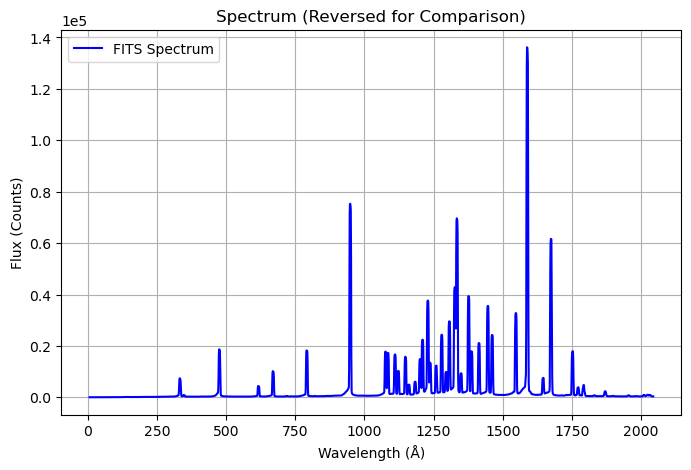

In [9]:
# Load the FITS spectrum file
with fits.open("/Users/nanditadas/Desktop/IRAF_tutorial/Copernico/lamp_combined_spec.fits") as hdul:
    data = hdul[0].data  # Extract flux values from the FITS file
    header = hdul[0].header  # Extract the header for metadata

# Extract wavelength and flux
# Wavelength is calculated using CRVAL1 (starting wavelength) and CDELT1 (wavelength interval per pixel)
wavelength = np.linspace(header['CRVAL1'], 
                         header['CRVAL1'] + header['CDELT1'] * (len(data) - 1), 
                         len(data))
flux = data  # Use actual flux values from the FITS file

# Reverse the wavelength axis for better alignment with reference data
wavelength = wavelength[::-1]

# Plot the spectrum
plt.figure(figsize=(8, 5))  # Set a larger figure size for better visualization
plt.plot(wavelength, flux, label="FITS Spectrum", color="blue")  # Plot wavelength vs. flux
plt.xlabel("Wavelength (Å)")  # Label for the x-axis
plt.ylabel("Flux (Counts)")  # Label for the y-axis (actual flux values in counts)
plt.title("Spectrum (Reversed for Comparison)")  # Title of the plot

# Configure y-axis to display scientific notation for better readability
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.grid(True)  # Add grid lines for better visual alignment
plt.legend()  # Add legend to distinguish the plot
plt.show()  # Display the plot

### Spectrum Comparison with Reference

In this comparison, I have matched the peaks from my combined lamp spectrum to the reference spectrum (Ne and HgCd lamps) using color-coded markers. The reference image was carefully analyzed, and corresponding emission lines were identified in my spectrum. This alignment confirms the accuracy of the wavelength calibration and the reliability of the identified features in the observed spectrum.

<div style="text-align: center;">
    <img src="compare.png" alt="Spectrum Comparison" style="width: 80% ;">
</div>

### Identification of Lamp Emission Lines

To calibrate the wavelength solution, the **Neon (Ne) and Mercury-Cadmium (HgCd) lamp spectra** were processed using IRAF's `identify` task. This step involves identifying reference emission lines within the lamp spectra, which are then used to map pixel coordinates to known wavelengths.

The first image shows the **initial identification of spectral lines**, where emission features are marked. The second image presents the **fitted dispersion solution**, confirming that the identified lines match the expected wavelengths.

<div style="display: flex; justify-content: space-around; align-items: center;">
    <div style="text-align: center;">
        <img src="identify_lcs.png" alt="Combination of Lamp" style="width: 95%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 1:</b> Initial identification of spectral emission lines.</p>
    </div>
    <div style="text-align: center;">
        <img src="identify_results_lcs.png" alt="Lamp Spectrum" style="width: 95%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 2:</b> Wavelength calibration solution fitted to emission lines.</p>
    </div>
</div>

### Refining the Wavelength Solution: Line Identification and Residuals

After identifying emission lines in the lamp spectrum, the **dispersion solution was refined** to improve accuracy. The goal was to minimize wavelength calibration errors by ensuring that the identified spectral lines align with their known reference wavelengths.

- The **first image** displays the identified **Neon (Ne) and Mercury-Cadmium (HgCd) emission lines**, with markers indicating their positions.
- The **second image** shows the **residuals of the wavelength fit**, which help assess the accuracy of the dispersion solution. Smaller residuals indicate a well-calibrated wavelength scale.

<div style="display: flex; justify-content: center; align-items: center;">
    <div style="text-align: center; width: 48%;">
        <img src="lcs_identify.png" alt="Spectrum Line Identification" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 1:</b> Identified spectral lines in the lamp spectrum.</p>
    </div>
    <div style="text-align: center; width: 48%;">
        <img src="lcs_residuals.png" alt="Wavelength Calibration Residuals" style="width: 98%; border: 2px solid black;">
        <p style="font-size: 90%; color: gray;"><b>Figure 2:</b> Residuals of the wavelength calibration fit.</p>
    </div>
</div>

## **3.2 Wavelength Mapping in Science Spectra**

### 3.2.1 Hedit Task
The `hedit` task in IRAF is used to edit the header of a FITS file. Here, need to add the keyword `REFSPEC1` to the header of the extracted spectrum file (`obj8_spec`) to reference the wavelength solution derived from the combined lamp spectrum (`lamp_combined_spec`). This step ensures that the wavelength calibration can be applied correctly in the next task.


The `hedit` task updates the FITS header of the extracted spectrum (`obj8_spec`) to reference the wavelength calibration spectrum (`lamp_combined_spec`). This ensures the correct wavelength mapping in the next step.

<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
    <div style="text-align: center; flex: 1;">
        <img src="hedit_lcs.png" alt="HEDIT Task Execution" style="width: 90%; max-width: 500px; border: 2px solid black;">
        <figcaption style="font-size: 95%; color: gray;"><b>Figure 1:</b> Running HEDIT to update the FITS header.</figcaption>
    </div>
    <div style="text-align: center; flex: 1;">
        <img src="hedit_output_lcs.png" alt="Updated FITS Header" style="width: 90%; max-width: 450px; border: 2px solid black;">
        <figcaption style="font-size: 95%; color: gray;"><b>Figure 2:</b> Updated FITS header linking spectrum to lamp reference.</figcaption>
    </div>
</div>


### 3.2.2 Dispcor Task 
The `dispcor` task applies the wavelength solution to the extracted spectrum. After running this task on `obj8_spec`, I obtained the final wavelength-mapped spectrum, where the x-axis now represents wavelength instead of pixel numbers. This mapping allows us to analyze the flux variation with respect to the wavelength.

The `dispcor` task replaces pixel numbers on the x-axis with wavelength values, mapping the spectrum correctly for further analysis.

<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
    <div style="text-align: center; flex: 1;">
        <img src="dispcor_lcs.png" alt="DISPCOR Task Execution" style="width: 90%; max-width: 500px; border: 2px solid black;">
        <figcaption style="font-size: 95%; color: gray;"><b>Figure 3:</b> Running DISPCOR to apply wavelength calibration.</figcaption>
    </div>
    <div style="text-align: center; flex: 1;">
        <img src="dispcor_output_lcs.png" alt="Wavelength-Calibrated Spectrum" style="width: 100%; max-width: 450px; border: 2px solid black;">
        <figcaption style="font-size: 95%; color: gray;"><b>Figure 4:</b> Final wavelength-mapped spectrum.</figcaption>
    </div>
</div>

---
Initially, when plotting the `obj8_speccor` spectrum, the vertical axis (flux range) was not constrained, leading to a graph dominated by high flux values. This made the detailed structure of the spectrum difficult to observe. 

The issue was resolved by applying a manual scaling of the vertical axis using the `y` parameter in the `splot` task within IRAF. By setting the flux range to a maximum value of 1250, the finer details and features of the spectrum became clearly visible, allowing for better interpretation and analysis. This process illustrates the importance of correctly scaling plots for effective visualization of data.

<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
    <div style="text-align: center; width: 100%;">
        <img src="wavelength_mapping_1.png" alt="Initial Spectrum with Full Range" style="width: 98%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 1:</b> Initial spectrum with full flux range, dominated by high values.</figcaption>
    </div>
    <div style="text-align: center; width: 100%;">
        <img src="wavelength_mapping_2.png" alt="Adjusted Spectrum with Smaller Range" style="width: 98%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 2:</b> Adjusted spectrum with constrained flux range, revealing finer details.</figcaption>
    </div>
</div>



**<h1 style="text-align: center; color: navy;">4: Flux Calibrations</h1>**

## 4.1 **Instrumental Response**

### Spectrum Extraction for Calibration Star

Before initiating the flux calibration process, it is essential to extract the spectrum of the calibration star. The calibration star used in this task is **BD+28 4211**, with its corresponding FITS file **AF507068_flatcor.fits**. The following steps were undertaken:

1. **Image Examination**: The calibration star's spectrum was inspected to identify the aperture for extraction. The flux along the dispersion direction was summed up to identify the spectrum position.
2. **Aperture Definition**: An aperture was manually defined and traced along the spectrum. The trace fitting was smooth, with an RMS value of **0.09766**, indicating good accuracy.
3. **Spectrum Extraction**: The spectrum of the calibration star was successfully extracted, ready to be used in the flux calibration step.

<div style="display: flex; justify-content: space-between; align-items: center;">
    <div style="text-align: center;">
        <img src="cali_star.png" alt="Calibration Star - Flux Summed" style="width: 88%; border: 1px solid black;">
        <p>Flux summed along the dispersion direction.</p>
    </div>
    <div style="text-align: center;">
        <img src="cali_star2.png" alt="Calibration Star - Aperture Defined" style="width: 88%; border: 1px solid black;">
        <p>Aperture defined for spectrum extraction.</p>
    </div>
</div>

<div style="display: flex; justify-content: space-between; align-items: center;">
    <div style="text-align: center;">
        <img src="cali_star3.png" alt="Calibration Star - Trace Fitting" style="width: 88%; border: 1px solid black;">
        <p>Trace fitting for the spectrum with RMS = 0.09766.</p>
    </div>
    <div style="text-align: center;">
        <img src="cali_star4.png" alt="Extracted Spectrum of Calibration Star" style="width: 88%; border: 1px solid black;">
        <p>Extracted spectrum of BD+28 4211.</p>
    </div>
</div>

### Wavelength Calibration

After troubleshooting various issues, I finally managed to apply the **wavelength calibration** using the `dispcor` task to the calibration star spectrum (`calistar_spec`). The x-axis now correctly shows the wavelength in angstroms, confirming the calibration. This is a crucial step before proceeding to flux calibration.

The process involved:
- Using `hedit` to ensure the `REFSPEC1` header was properly set.
- Running `dispcor` after fixing database errors and rechecking the input files.


<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <!-- Hedit Task and its result -->
    <div style="text-align: center; width: 48%;">
        <p><strong>Hedit Task:</strong></p>
        <img src="calistar_spec_hedit.png" alt="Hedit Task Image" style="width: 98%; border: 1px solid black;">
        <p><strong>Hedit Result:</strong></p>
        <img src="calistar_spec_hedit_output.png" alt="Hedit Result Image" style="width: 98%; border: 1px solid black;">
</div>
    
<!-- Dispcor Task and its result -->
<div style="text-align: center; width: 48%;">
        <p><strong>Dispcor Task:</strong></p>
        <img src="calistar_spec_dispcor.png" alt="Dispcor Task Image" style="width: 98%; border: 1px solid black;">
        <p><strong>Dispcor Result:</strong></p>
        <img src="calistar_spec_dispcor_output.png" alt="Dispcor Result Image" style="width: 98%; border: 1px solid black;">
    </div>
</div>


Initially, when plotting the `calistar_speccor` spectrum, the vertical axis (flux range) was not constrained, leading to a graph dominated by high flux values by lamp spectrum. The issue was resolved by applying a manual scaling of the vertical axis using the `y` parameter in the `splot` task within IRAF. By setting the flux range to a maximum value of 35000, the finer details and features of the spectrum became clearly visible, allowing for better interpretation and analysis.Here is the result showing the calibrated spectrum:


<div style="display: flex; justify-content: space-around; align-items: center;">
    <div style="text-align: center;">
        <img src="wm_calispeccor1.png" alt="Initial Spectrum with Full Range" style="width: 90%; border: 1px solid black;">
        <p><strong>Figure 1:</strong> Initial calibration star spectrum with full flux range.</p>
    </div>
    <div style="text-align: center;">
        <img src="wm_calispeccor2.png" alt="Adjusted Spectrum with Smaller Range" style="width: 90%; border: 1px solid black;">
        <p><strong>Figure 2:</strong> Adjusted spectrum with a smaller flux range.</p>
    </div>
</div>

## 4.1.1 Setting up Flux Correction

Flux correction is a crucial step in spectroscopic data reduction, ensuring that the extracted spectrum is accurately calibrated in terms of flux. This process involves applying a standard star observation to correct for instrumental and atmospheric effects, allowing for a more precise representation of the true spectral energy distribution of the target object.

Below, the standard IRAF task for flux calibration is shown, including its input parameters and the resulting corrected spectrum.

<div style="text-align: center;">
    <p><strong>Standard Task Input:</strong></p>
    <img src="standard_calispeccor.png" alt="Standard Task Input" style="width: 55%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray;"><b>Figure 1:</b> Input configuration for the standard flux correction task.</figcaption>
</div>

<div style="text-align: center; margin-top: 15px;">
    <p><strong>Standard Task Result:</strong></p>
    <img src="standard_result_calispeccor.png" alt="Standard Task Result" style="width: 55%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray;"><b>Figure 2:</b> Output result of the flux calibration process.</figcaption>
</div>

## 4.1.2 Fitting the Sensitivity Function

The sensitivity function is derived from standard star observations to determine the system’s response across different wavelengths. This function accounts for instrumental throughput and atmospheric extinction, allowing us to calibrate the flux of science spectra accurately.

Below, the IRAF sensfunc task is used to fit the sensitivity function, with its input parameters and the resulting sensitivity curve displayed.

<div style="text-align: center;">
    <p><strong>Sensitivity Task Input:</strong></p>
    <img src="sensfunc_calispeccor.png" alt="Sensitivity Task Input" style="width: 55%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray;"><b>Figure 1:</b> Input parameters for fitting the sensitivity function.</figcaption>
</div>

<div style="text-align: center; margin-top: 15px;">
    <p><strong>Sensitivity Task Result:</strong></p>
    <img src="sensfunc_result.png" alt="Sensitivity Task Result" style="width: 60%; border: 1px solid black;">
    <figcaption style="font-size: 90%; color: gray;"><b>Figure 2:</b> Output sensitivity function after fitting the standard star spectrum.</figcaption>
</div>


## 4.1.3 Applying the Flux Correction

Flux correction ensures that the extracted spectrum is properly calibrated by applying the response function derived from standard star observations. This step adjusts for instrumental and atmospheric effects, converting raw counts into absolute flux values. The calibrate task in IRAF is used to apply this correction to the science spectrum.

<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
    <div style="text-align: center; width: 60%;">
        <img src="calibrate.png" alt="Calibrate Task Input" style="width: 110%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 1:</b> Input parameters for the flux calibration task.</figcaption>
    </div>
    <div style="text-align: center; width: 48%;">
        <img src="calibrate_output.png" alt="Calibrate Task Result" style="width: 80%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 2:</b> Calibrated spectrum after applying the flux correction.</figcaption>
    </div>
</div>

### **Flux-Calibrated Spectrum of 3C66A**

The spectrum below shows the flux-calibrated data for 3C66A, with wavelength (Å) on the x-axis and flux (erg s⁻¹ cm⁻² Å⁻¹) on the y-axis. The continuum decreases toward longer wavelengths, typical for AGN emission. Several absorption features are visible, likely corresponding to telluric lines or intrinsic absorption from the host galaxy. The calibration ensures that the flux values are accurately scaled, allowing for further spectral analysis.

<div style="text-align: center;">
    <img src="splot_obj8_fluxcor.png" alt="Object 8 after flux correction" style="width: 60%; border: 1px solid black;">
</div>

## 4.2 Correction for Interstellar Extinction

Interstellar extinction **reddens** the observed spectrum due to dust scattering and absorption along the line of sight. To correct for this effect, the **dereddening** procedure was applied using the `deredden` task in IRAF. This restores the intrinsic spectral shape by compensating for extinction, ensuring a more accurate flux distribution across wavelengths for reliable spectral analysis.

<div style="display: flex; justify-content: center; align-items: center; gap: 20px;">
    <div style="text-align: center; width: 50%;">
        <img src="deredden.png" alt="Dereddening Task Input" style="width: 100%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 1:</b> Input parameters for the dereddening process.</figcaption>
    </div>
    <div style="text-align: center; width: 48%;">
        <img src="deredden_output.png" alt="Dereddening Task Result" style="width: 70%; border: 2px solid black;">
        <figcaption style="font-size: 90%; color: gray;"><b>Figure 2:</b> Corrected spectrum after applying dereddening.</figcaption>
    </div>
</div>

## **Corrected Spectrum After Interstellar Extinction Removal**

The spectra before and after extinction correction show minimal difference, with only a slight shift in flux values along the y-axis. The minimal difference between the spectra aligns with the low extinction value (0.223), suggesting only a slight flux scaling rather than a significant correction. The spectral shape remains unchanged, with no major impact on absorption features. Any subtle reddening effects, especially at shorter wavelengths, would be minor. The shift is likely due to normalization rather than a true extinction correction.

<div style="text-align: center;">
    <img src="splot_obj8_dered.png" alt="Object 8 after dereddning" style="width: 60%; border: 1px solid black;">
</div>



The above plot represents the **flux-calibrated spectrum of 3C66A after applying interstellar extinction correction** using the `deredden` task in IRAF. The x-axis corresponds to **wavelength (in angstroms)**, while the y-axis represents **flux in erg/cm²/s/Å**.



## References

- **Homework Reference:** [IRAF Spectroscopy Task 11 - Data Reduction](https://www.lsw.uni-heidelberg.de/users/jheidt/praktikum/Astrolab_material/Task11/Task11.pdf)
- **IRAF Documentation:** [IRAF Community Website](https://iraf-community.github.io/)
- **IRAF Beginner’s Guide:** [A User’s Guide to IRAF](https://iraf-community.github.io/doc/beguide.pdf)
- **Asiago IRAF Tutorial:** [A Step-by-Step Guide to IRAF for Spectroscopy](https://www.astrogeo.va.it/ans_spectroscopy/asiago_iraf_tutorial.pdf)
- **Tody, D. (1986).** ["The IRAF Data Reduction and Analysis System."](https://ui.adsabs.harvard.edu/abs/1986SPIE..627..733T/abstract) *Proc. SPIE Instrumentation in Astronomy VI*, **627**, 733.
- **Tody, D. (1993).** ["IRAF in the Nineties."](https://ui.adsabs.harvard.edu/abs/1993ASPC...52..173T/abstract) *Astronomical Data Analysis Software and Systems II*, **52**, 173.
- **Smith, R. J. (2011).** ["DS9: A Reference Guide."](https://ui.adsabs.harvard.edu/abs/2011ASPC..442..355S/abstract) *Astronomical Data Analysis Software and Systems XX*, **442**, 355.
- **Stetson, P. B. (1987).** ["DAOPHOT: A Computer Program for Crowded-Field Stellar Photometry."](https://ui.adsabs.harvard.edu/abs/1987PASP...99..191S/abstract) *PASP*, **99**, 191.

